<a href="https://colab.research.google.com/github/rizqyjoe/FER2013_VGG16BaseModel/blob/main/Model%203/With%20Aug2/Epoch%2050/001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Pre-processing

In [1]:
import tensorflow as tf
import keras
from keras import backend as K
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras.utils import np_utils

import random

tf.random.set_seed(1234)
np.random.seed(1234)

from keras.initializers import glorot_uniform

In [2]:
#load file
data= pd.read_csv('/content/drive/MyDrive/Dataset/fer2013 dataset/fer2013/fer2013.csv')
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [3]:
data.emotion.value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [4]:
data.Usage.value_counts()

Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64

In [5]:
emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
labels=np.array(("Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"))

In [6]:
#split data 
train_set = data[(data.Usage == 'Training')] 
val_set = data[(data.Usage == 'PublicTest')]
test_set = data[(data.Usage == 'PrivateTest')] 
X_train = np.array(list(map(str.split, train_set.pixels)), np.float32) 
X_val = np.array(list(map(str.split, val_set.pixels)), np.float32) 
X_test = np.array(list(map(str.split, test_set.pixels)), np.float32) 
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1) 
X_val = X_val.reshape(X_val.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

In [7]:
num_classes = 7

y_train = train_set.emotion 
y_train = np_utils.to_categorical(y_train, num_classes) 
y_val = val_set.emotion 
y_val = np_utils.to_categorical(y_val, num_classes) 
y_test = test_set.emotion 
y_test = np_utils.to_categorical(y_test, num_classes)

In [8]:
print("x_train:",X_train.shape)
print("y_train:",y_train.shape)
print("x_val:",X_val.shape)
print("y_val:",y_val.shape)
print("x_test:",X_test.shape)
print("y_test:",y_test.shape)

x_train: (28709, 48, 48, 1)
y_train: (28709, 7)
x_val: (3589, 48, 48, 1)
y_val: (3589, 7)
x_test: (3589, 48, 48, 1)
y_test: (3589, 7)


In [9]:
#data augmentation
'''datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range = 10,
                             horizontal_flip = True,
                             width_shift_range=0.2,
                             height_shift_range=0.1)'''

datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=10,
                             width_shift_range=0.2,
                             height_shift_range=0.2, 
                             zoom_range=0.2,
                             horizontal_flip=True)

#datagen = ImageDataGenerator(rescale=1./255)

testgen = ImageDataGenerator(rescale=1./255)

datagen.fit(X_train)
batch_size = 64

In [10]:
train_flow = datagen.flow(X_train, y_train, batch_size=batch_size) 
val_flow = testgen.flow(X_val, y_val, batch_size=batch_size) 
test_flow = testgen.flow(X_test, y_test, batch_size=batch_size)

In [11]:
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot

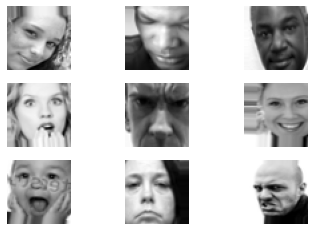

In [12]:
#displaying sample images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9): 
        pyplot.axis('off') 
        pyplot.subplot(330 + 1 + i) 
        pyplot.imshow(X_batch[i].reshape(48, 48), cmap=pyplot.get_cmap('gray'))
    pyplot.axis('off') 
    pyplot.show() 
    break

# Training Model

In [ ]:
#Model 1
'''from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, Conv2D, MaxPool2D, BatchNormalization, Activation

input_shape = (48, 48, 1)

model = Sequential()

model.add(Conv2D(filters=64,input_shape=(input_shape),kernel_size=(3,3),padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=1)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=1)))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=1)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=1)))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=1)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=1)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=1)))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=1)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=1)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=1)))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=num_classes, activation='softmax'))

# print the model summary
model.summary()

In [ ]:
'''#Model 2
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, Conv2D, MaxPool2D, BatchNormalization, Activation

input_shape = (48, 48, 1)

model = Sequential()

model.add(Conv2D(filters=64,input_shape=(input_shape),kernel_size=(3,3),padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.6))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.6))

model.add(Dense(units=num_classes, activation='softmax'))

# print the model summary
model.summary()

In [13]:
#Model 3
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, Conv2D, MaxPool2D, BatchNormalization, GlobalAveragePooling2D

input_shape = (48, 48, 1)

model = Sequential()

model.add(Conv2D(filters=64,input_shape=(input_shape),kernel_size=(3,3),padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", kernel_initializer = glorot_uniform(seed=0)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.6))

#model.add(Flatten())
model.add(GlobalAveragePooling2D())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.6))

model.add(Dense(units=num_classes, activation='softmax'))

# print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       7

In [ ]:
#save plot model to file
from keras.utils.vis_utils import plot_model
plot_model(model, to_file="model_3.png", show_shapes=True, show_layer_names=False)

In [15]:
#compile model
from keras.optimizers import Adam,SGD,RMSprop

opt = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [16]:
# fit the model
num_epochs = 50
history = model.fit(train_flow, 
                    steps_per_epoch=len(X_train) // batch_size, 
                    epochs=num_epochs,  
                    verbose=1,  
                    validation_data=val_flow,  
                    validation_steps=len(X_val) // batch_size)

Epoch 1/50
448/448 [==============================] - 54s 76ms/step - loss: 3.6011 - accuracy: 0.1708 - val_loss: 1.8272 - val_accuracy: 0.2494
Epoch 2/50
448/448 [==============================] - 32s 71ms/step - loss: 1.9791 - accuracy: 0.2050 - val_loss: 1.8276 - val_accuracy: 0.2517
Epoch 3/50
448/448 [==============================] - 32s 71ms/step - loss: 1.8807 - accuracy: 0.2152 - val_loss: 1.8153 - val_accuracy: 0.2500
Epoch 4/50
448/448 [==============================] - 32s 71ms/step - loss: 1.8553 - accuracy: 0.2206 - val_loss: 1.8091 - val_accuracy: 0.2514
Epoch 5/50
448/448 [==============================] - 32s 71ms/step - loss: 1.8383 - accuracy: 0.2320 - val_loss: 1.8071 - val_accuracy: 0.2486
Epoch 6/50
448/448 [==============================] - 32s 71ms/step - loss: 1.8223 - accuracy: 0.2331 - val_loss: 1.7983 - val_accuracy: 0.2522
Epoch 7/50
448/448 [==============================] - 32s 71ms/step - loss: 1.8068 - accuracy: 0.2424 - val_loss: 1.7715 - val_accuracy:

# Evaluate

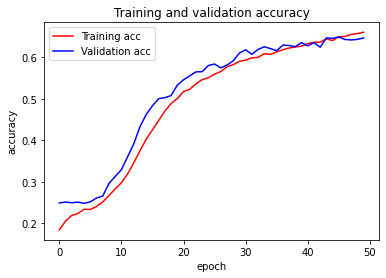

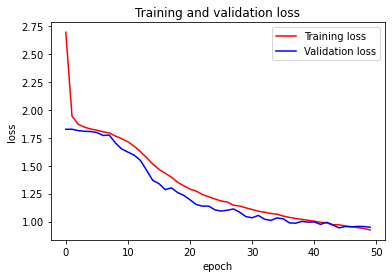

In [17]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
num_epochs = range(len(accuracy))
plt.plot(num_epochs, accuracy, 'r', label='Training acc')
plt.plot(num_epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(num_epochs, loss, 'r', label='Training loss')
plt.plot(num_epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
plt.show()

In [18]:
trainloss = model.evaluate(train_flow, steps=len(X_train) / batch_size) 
print("Train Loss " + str(trainloss[0]))
print("Train Acc: " + str(trainloss[1]))
valloss = model.evaluate(val_flow, steps=len(X_val) / batch_size) 
print("Val Loss " + str(valloss[0]))
print("Val Acc: " + str(valloss[1]))
testloss = model.evaluate(test_flow, steps=len(X_test) / batch_size) 
print("Test Loss " + str(testloss[0]))
print("Test Acc: " + str(testloss[1]))

448/448 [==============================] - 13s 28ms/step - loss: 0.8334 - accuracy: 0.6878
Train Loss 0.8333908915519714
Train Acc: 0.6878330707550049
56/56 [==============================] - 2s 30ms/step - loss: 0.9485 - accuracy: 0.6473
Val Loss 0.9485341310501099
Val Acc: 0.6472554802894592
56/56 [==============================] - 1s 20ms/step - loss: 0.8952 - accuracy: 0.6670
Test Loss 0.8952311277389526
Test Acc: 0.6670381426811218


In [19]:
def plot_confusion_matrix(y_test, y_pred, classes,
                          normalize=False,
                          title='Unnormalized confusion matrix',
                          cmap=plt.cm.Blues):
    cm = confusion_matrix(y_test, y_pred)
    
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)
        
    np.set_printoptions(precision=2)
    
    plt.rcParams["figure.figsize"] = (8,8)  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.min() + (cm.max() - cm.min()) / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True expression')
    plt.xlabel('Predicted expression')
    plt.show()

In [20]:
y_pred_ = model.predict(X_test/255., verbose=1)
y_pred = np.argmax(y_pred_, axis=1)
t_te = np.argmax(y_test, axis=1)

113/113 [==============================] - 3s 12ms/step


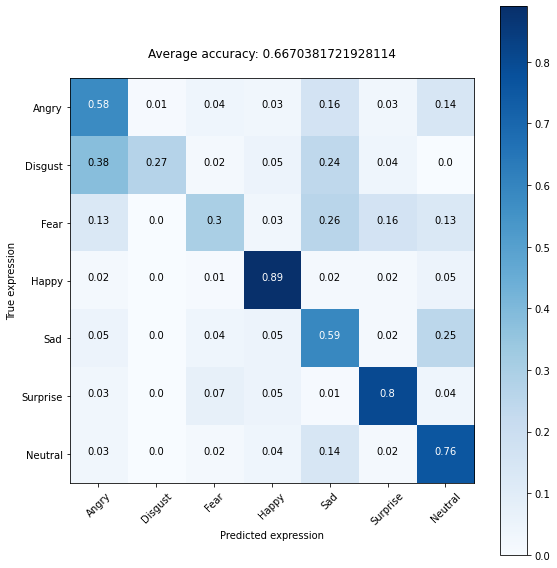

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
import itertools

fig = plot_confusion_matrix(y_test=t_te, y_pred=y_pred,
                      classes=labels,
                      normalize=True,
                      cmap=plt.cm.Blues,
                      title='Average accuracy: ' + str(np.sum(y_pred == t_te)/len(t_te)) + '\n')

In [22]:
emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
print(classification_report(t_te, y_pred, target_names=emotions.values()))

              precision    recall  f1-score   support

       Angry       0.63      0.58      0.61       491
     Disgust       0.65      0.27      0.38        55
        Fear       0.63      0.30      0.40       528
       Happy       0.88      0.89      0.88       879
         Sad       0.51      0.59      0.54       594
    Surprise       0.71      0.80      0.75       416
     Neutral       0.58      0.76      0.66       626

    accuracy                           0.67      3589
   macro avg       0.66      0.60      0.60      3589
weighted avg       0.67      0.67      0.66      3589



In [23]:
model.save("/content/drive/MyDrive/Colab Notebooks/Model/Model3_Adam0.0001_epoch50_Aug2.h5")
print("saved")

saved


#Load Model

In [24]:
from keras.models import load_model
model_load = load_model('/content/drive/MyDrive/Colab Notebooks/Model/Model3_Adam0.0001_epoch50_Aug2.h5')

model_load.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       7

In [25]:
trainloss = model_load.evaluate(train_flow, steps=len(X_train) / batch_size) 
print("Train Loss " + str(trainloss[0]))
print("Train Acc: " + str(trainloss[1]))
valloss = model_load.evaluate(val_flow, steps=len(X_val) / batch_size) 
print("Val Loss " + str(valloss[0]))
print("Val Acc: " + str(valloss[1]))
testloss = model_load.evaluate(test_flow, steps=len(X_test) / batch_size) 
print("Test Loss " + str(testloss[0]))
print("Test Acc: " + str(testloss[1]))

448/448 [==============================] - 15s 30ms/step - loss: 0.8324 - accuracy: 0.6889
Train Loss 0.8324189782142639
Train Acc: 0.6889477372169495
56/56 [==============================] - 1s 20ms/step - loss: 0.9485 - accuracy: 0.6473
Val Loss 0.9485339522361755
Val Acc: 0.6472554802894592
56/56 [==============================] - 1s 20ms/step - loss: 0.8952 - accuracy: 0.6670
Test Loss 0.8952309489250183
Test Acc: 0.6670381426811218


In [26]:
def plot_confusion_matrix(y_test, y_pred, classes,
                          normalize=False,
                          title='Unnormalized confusion matrix',
                          cmap=plt.cm.Blues):
    cm = confusion_matrix(y_test, y_pred)
    
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)
        
    np.set_printoptions(precision=2)
        
    plt.rcParams["figure.figsize"] = (8,8)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.min() + (cm.max() - cm.min()) / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True expression')
    plt.xlabel('Predicted expression')
    plt.show()

In [27]:
y_pred_ = model_load.predict(X_test/255., verbose=1)
y_pred = np.argmax(y_pred_, axis=1)
t_te = np.argmax(y_test, axis=1)

113/113 [==============================] - 2s 12ms/step


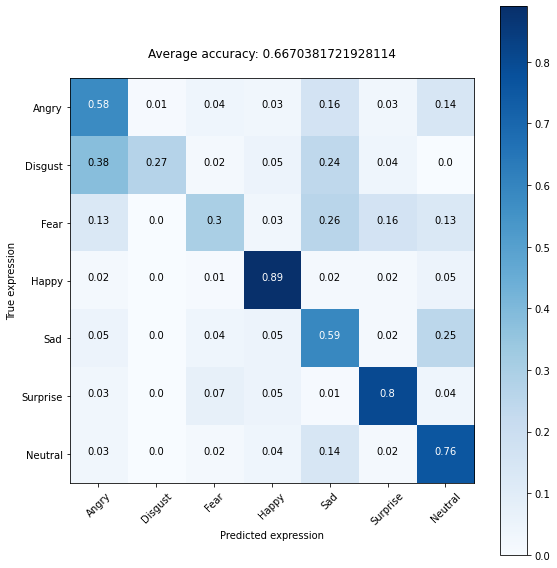

In [28]:
from sklearn.metrics import confusion_matrix, classification_report
import itertools

fig = plot_confusion_matrix(y_test=t_te, y_pred=y_pred,
                      classes=labels,
                      normalize=True,
                      cmap=plt.cm.Blues,
                      title='Average accuracy: ' + str(np.sum(y_pred == t_te)/len(t_te)) + '\n')

In [29]:
emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
print(classification_report(t_te, y_pred, target_names=emotions.values()))

              precision    recall  f1-score   support

       Angry       0.63      0.58      0.61       491
     Disgust       0.65      0.27      0.38        55
        Fear       0.63      0.30      0.40       528
       Happy       0.88      0.89      0.88       879
         Sad       0.51      0.59      0.54       594
    Surprise       0.71      0.80      0.75       416
     Neutral       0.58      0.76      0.66       626

    accuracy                           0.67      3589
   macro avg       0.66      0.60      0.60      3589
weighted avg       0.67      0.67      0.66      3589



# Predict

In [30]:
emotions_lab = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
def emotion_analysis(emotions):
    emotions_lab = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    y_pos = np.arange(len(emotions_lab))
    plt.bar(y_pos, emotions, align='center', alpha=0.9)
    plt.tick_params(axis='x', which='both', pad=10,width=4,length=10)
    plt.xticks(y_pos, emotions_lab)
    plt.ylabel('percentage')
    plt.title('emotion')
    plt.show()

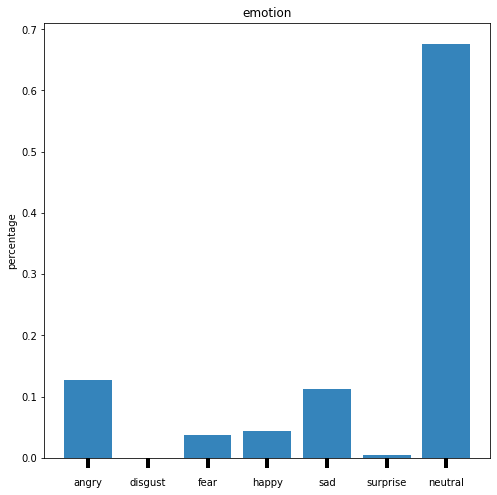

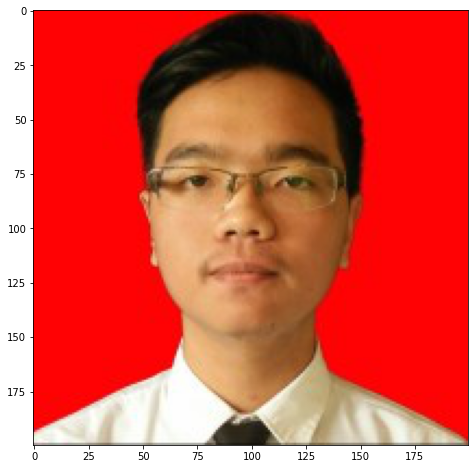

Expression Prediction: neutral


In [31]:
from skimage import io
img = image.load_img('/content/drive/MyDrive/Colab Notebooks/Predict/a.jpg', color_mode = "grayscale", target_size=(48, 48))
show_img=image.load_img('/content/drive/MyDrive/Colab Notebooks/Predict/a.jpg', target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',emotions_lab[ind])